In [123]:
#setup
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [124]:
df = pd.read_feather('../databases/recursos.feather')
df = df.set_index('ano')

def basic_plot(title, xlabel, ylabel, sub):
    plt.figure(figsize=(16,6))
    plt.title(title)

    sub()    
    
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["left"].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.legend(frameon=False)

# Reservas/Recursos
Vamos começar plotando diretamente os dados de cada recurso/reserva:

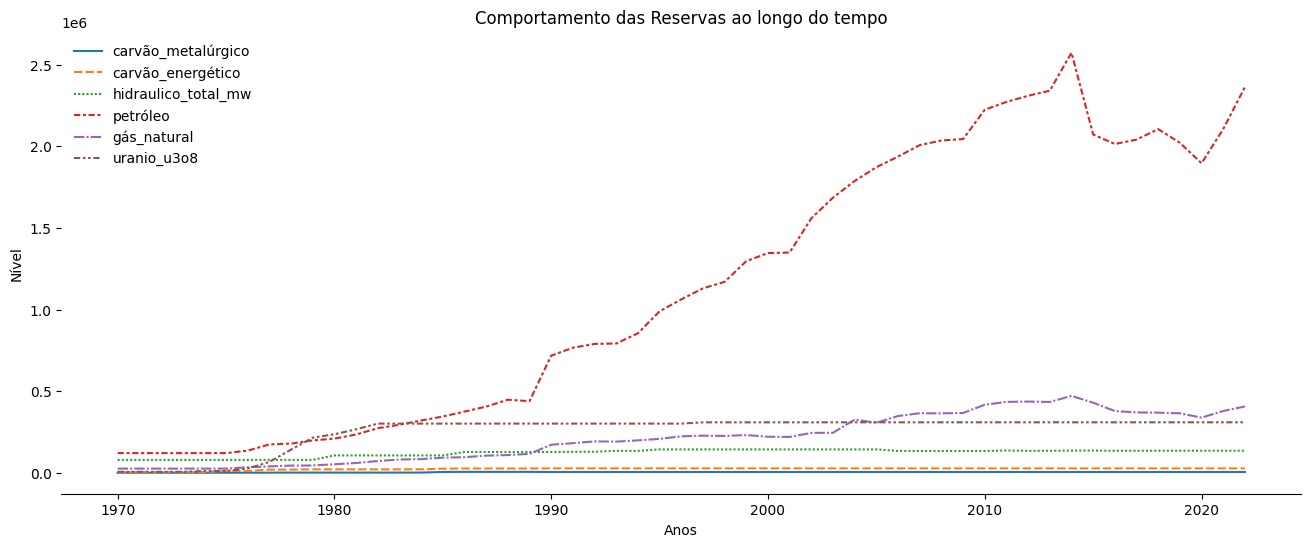

In [125]:
df_energia = df[['carvão_metalúrgico', 'carvão_energético', 'hidraulico_total_mw', 'petróleo', 'gás_natural', 'uranio_u3o8']]

def plot():
    sns.lineplot(df_energia)
    
basic_plot('Comportamento das Reservas ao longo do tempo', 'Anos', 'Nível', plot)

Percebe-se claramente a escala do petróleo, o Brasil é um país com reservas abundantes, a partir de 1990, com a exploração da bacia de campos e em 2006 com a descoberta do pré-sal, as reservas de petróleo aumentam significativamente. Em meados de 1973/1980, com a crise do petróleo, ao buscar alternativas, o governo investe na exploração de urânio, explicando esse aumento rápido seguido de uma estabilidade que dura até hoje. Gás natural segue uma curva consistente. O potencial hidrelétrico segue aumentando à pequenos passos apesar de ser a principal fonte de energia brasileira atualmente

# Mudanças Percentuais ao Longo do tempo
Visualizar as mudanças percentuais dos recursos vai nos ajudar a encontrar picos de produção, a entender melhor o comportamento ao longo do tempo, também encontrará recursos estagnados/estáveis.

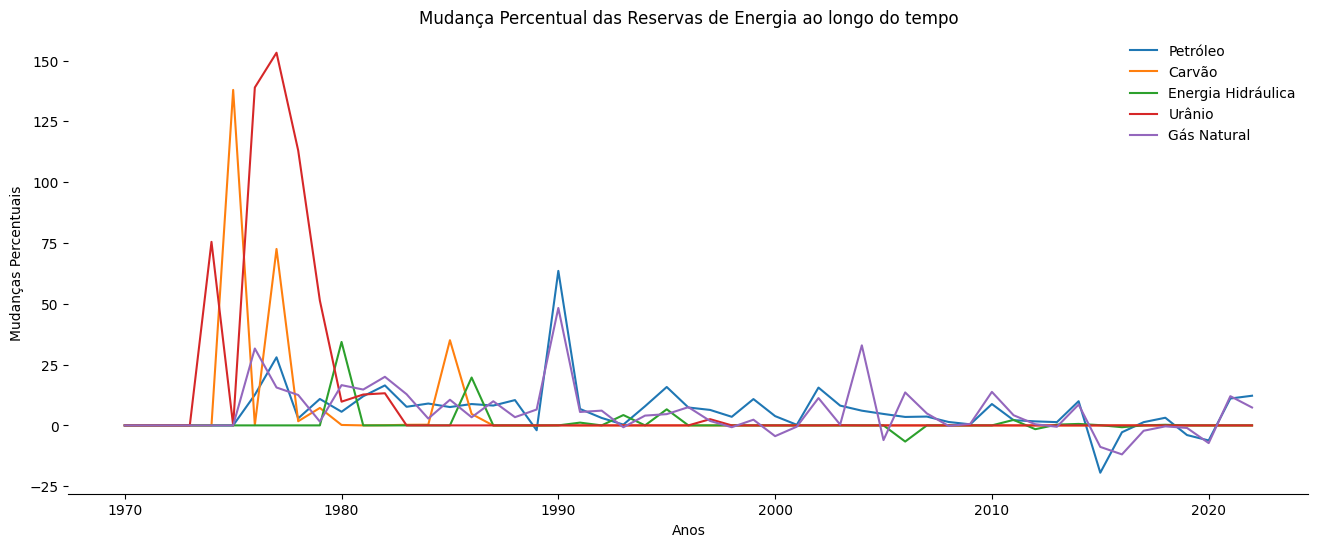

In [126]:
def plot():
    sns.lineplot(df, x=df.index, y=df['petroleo_mudança_perct'], label="Petróleo")
    sns.lineplot(df, x=df.index, y=df['carvão_total_mudança_perct'], label="Carvão")
    sns.lineplot(df, x=df.index, y=df['hidraulico_total_mw_mudança_perct'], label="Energia Hidráulica")
    sns.lineplot(df, x=df.index, y=df['uranio_u3o8_mudança_perct'], label="Urânio")
    sns.lineplot(df, x=df.index, y=df['gás_natural_mudança_perct'], label="Gás Natural")

basic_plot('Mudança Percentual das Reservas de Energia ao longo do tempo', 'Anos', 'Mudanças Percentuais', plot)


Logo de cara se vê o "boom" no urânio e no carvão nos anos 1970-1980, seguidos de uma rápida estabilização, Isso se deve à crise do petróleo, como previamente dito, onde o Governo estava em busca de novas fontes de energia, e destinou grandes investimentos à prospecção, pesquisa, desenvolvimento de métodos e técnicas de trabalho e lavra de jazidas de urânio, também passou a buscar mais o carvão (metalúrgico).

A energia hidráulica é uma das principais fontes de energia do país, e se mantém estável durante esse período, possui definitivamente menos oscilações do que petróleo e gás natural, que andam numa trajetória muito semelhante 

# Consumo
Vamos plotar os dados do consumo total de cada recurso energético.

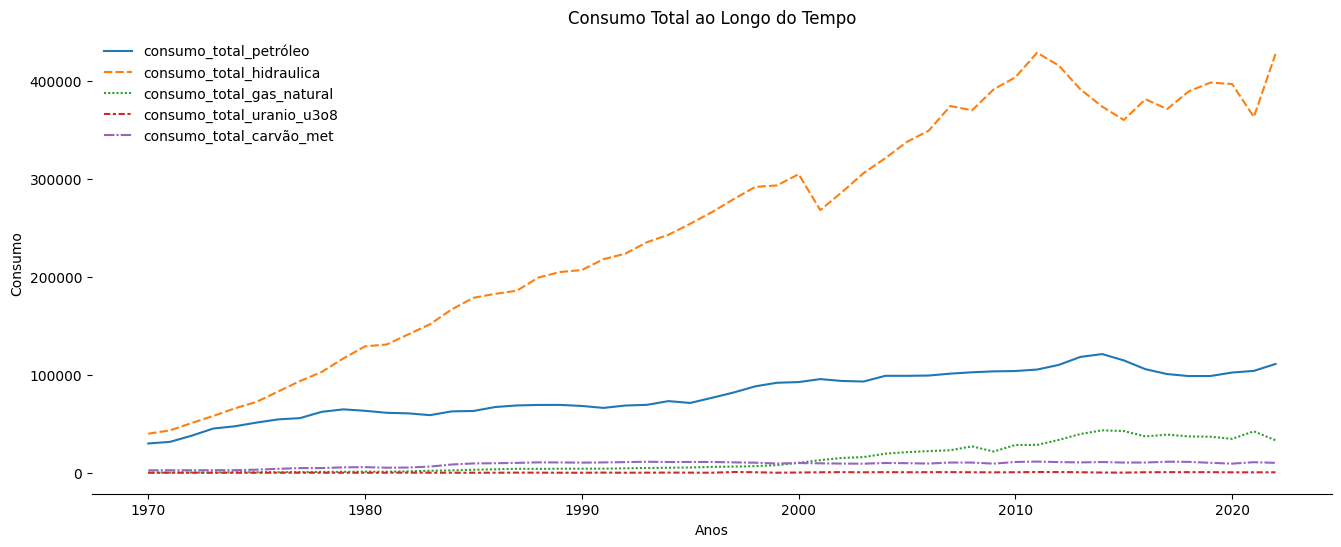

In [127]:
colunas_consumo_total = df.columns[df.columns.str.startswith('consumo_total')]
df_consumo = df[colunas_consumo_total]

def plot():
    sns.lineplot(df_consumo)

basic_plot('Consumo Total ao Longo do Tempo', 'Anos', 'Consumo', plot)

No brasil, a fonte de energia mais utilizada é a hidrelética, e isso se vê claramente pela escalada do consumo da energia hidrelétrica, o consumo de energia vinda de derivados de petróleo se mantém estável com um leve aumento em meados de 2005. O mais curioso é o comportamento do gás natural, que somente a partir dos anos 2000 viu seu consumo aumentar, se apresentando como alternativa. Urânio e Carvão se mantém estáveis, com baixo consumo final.

# Produção
Vamos plotar os dados de produção de cada recurso.

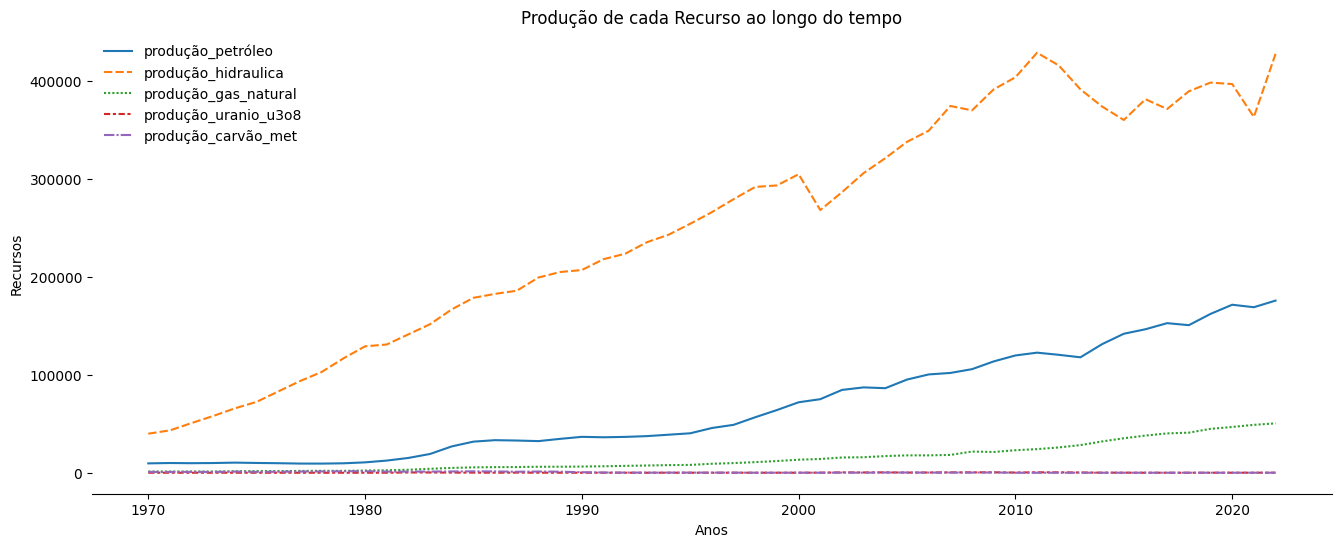

In [128]:
colunas_produção = df.columns[df.columns.str.startswith('produção')]
df_produção = df[colunas_produção]

def plot():
    sns.lineplot(df_produção)
    
basic_plot('Produção de cada Recurso ao longo do tempo', 'Anos', 'Recursos', plot)

Percebe-se que a produção e o potencial hidrelétrico seguem uma curva idêntica, ou seja, 100% da energia hidrelétrica é consumida, estabelecendo uma relação (muito) linear entre essas variáveis. petróleo e gás seguem um padrão muito parecido. Nota-se que a curva de produção do petróleo é ligeiramente mais íngrime que a de consumo.

# Relação entre o nível das reservas e a produção de energia
Vamos visualizar a relação entre os níveis das reservas e a produção de energia, o que pode ser uma informação importante.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


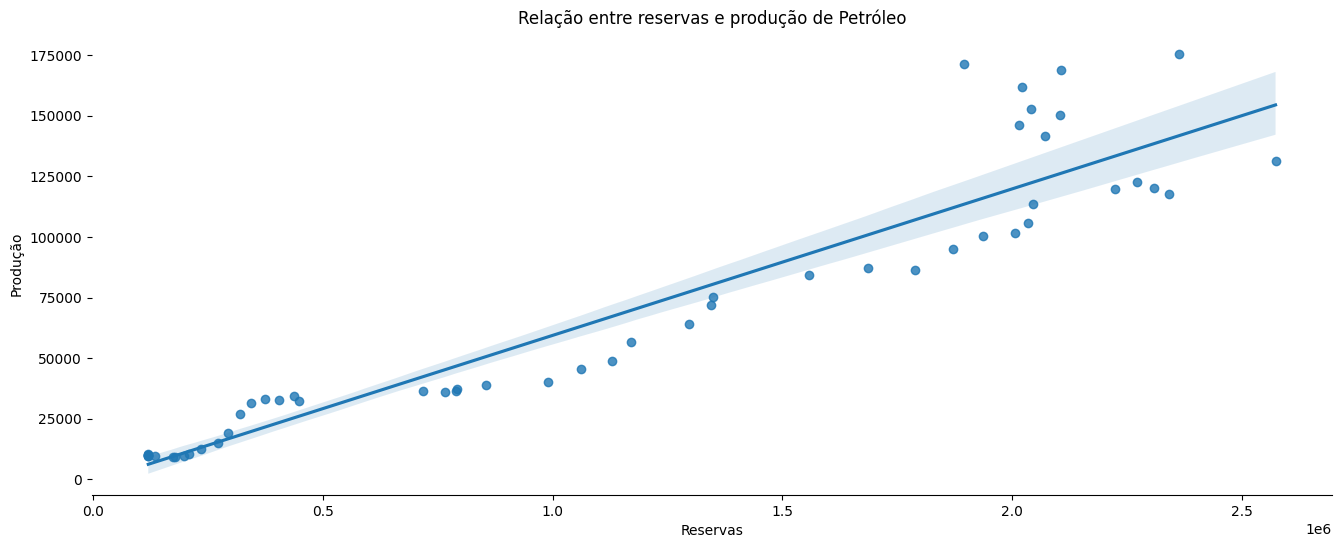

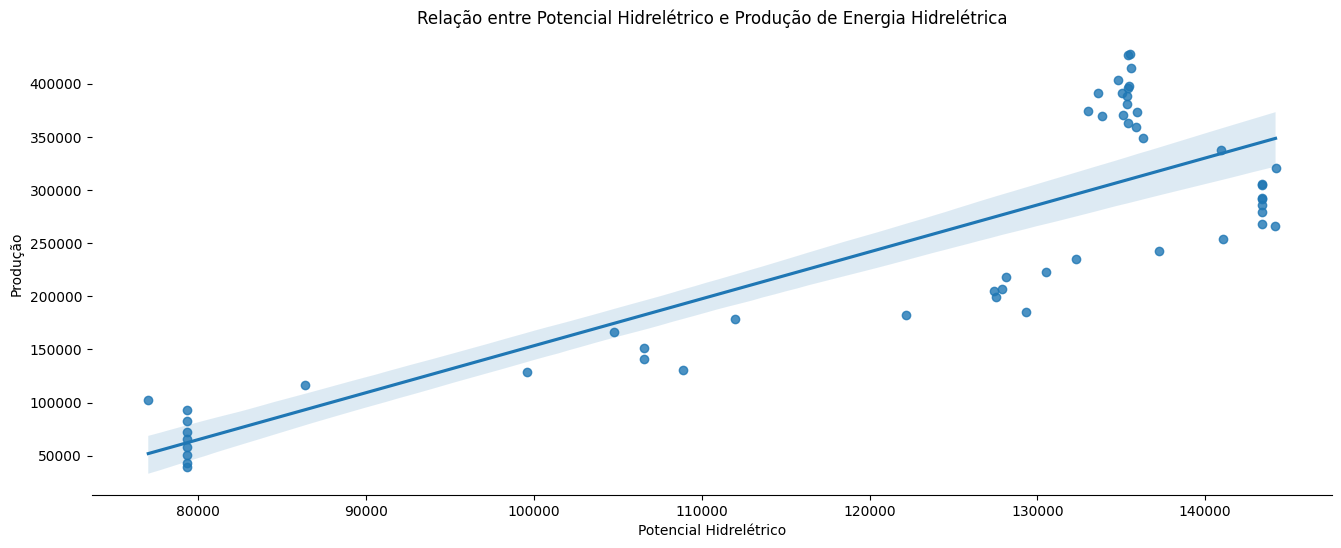

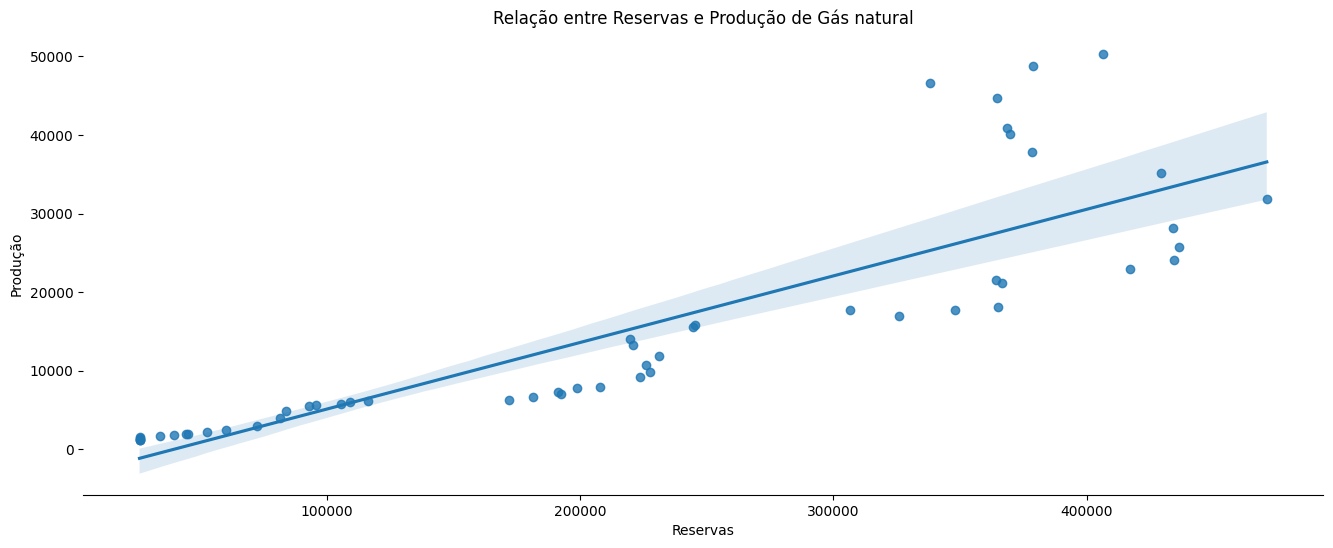

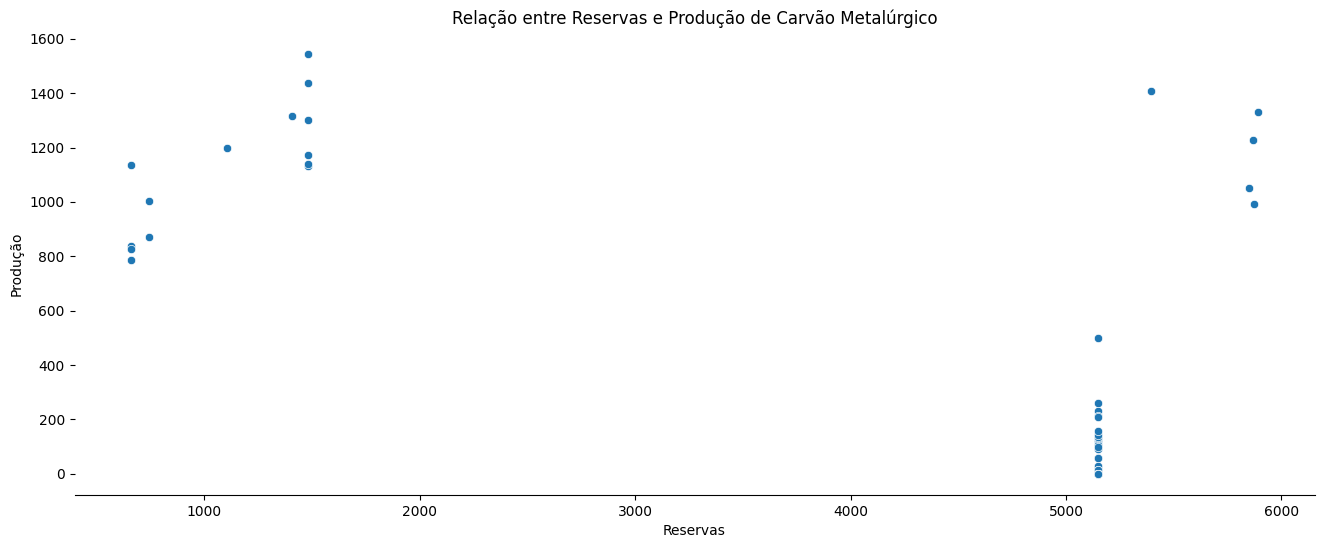

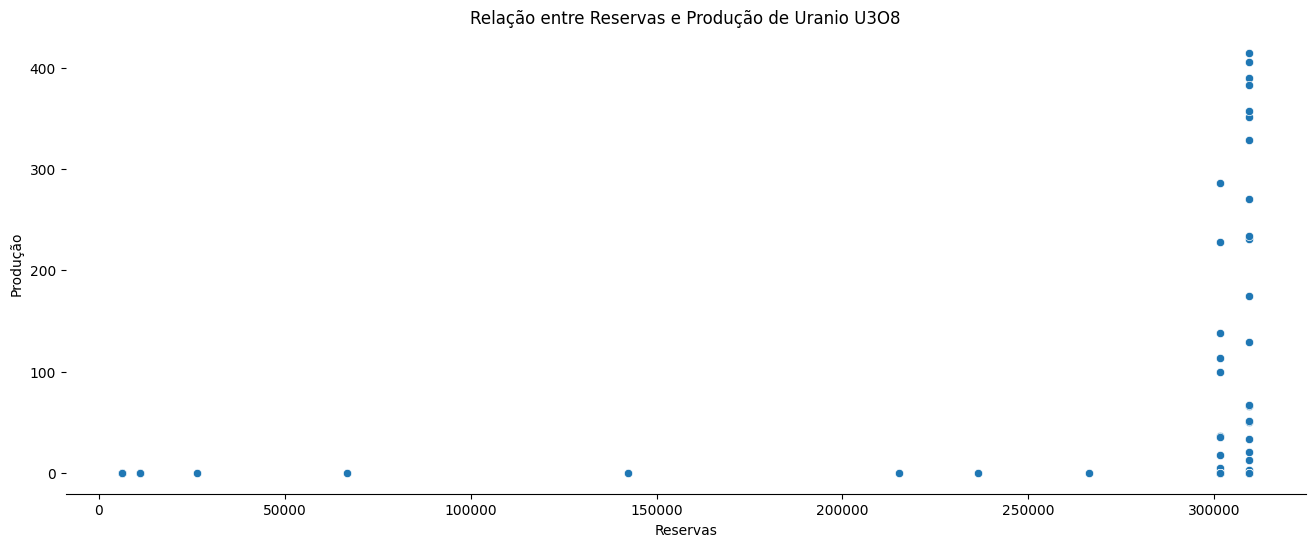

In [133]:
from scipy.signal import savgol_filter
def plot_pet():
    sns.regplot(df, x=df['petróleo'], y=df['produção_petróleo'])

def plot_hidr():
    # Aplicamos um filtro para suavizar a curva de potencial hidrelétrico
    # porque ela apresenta muitos picos bruscos, o que pode dificultar a visualização
    # do relacionamento entre as duas variáveis, podemos preservar o máximo de informação
    # possível e visualizar com mais clareza após a filtragem.
    df['hidraulico_total_mw_filt'] = savgol_filter(df['hidraulico_total_mw'], window_length=5, polyorder=2)
    sns.regplot(df, x=df['hidraulico_total_mw_filt'], y=df['produção_hidraulica'])

def plot_gas():
    sns.regplot(df, x=df['gás_natural'], y=df['produção_gas_natural'])

def plot_carv():
    sns.scatterplot(df, x=df['carvão_metalúrgico'], y=df['produção_carvão_met'])

def plot_uran():
    sns.scatterplot(df, x=df['uranio_u3o8'], y=df['produção_uranio_u3o8'])

basic_plot('Relação entre reservas e produção de Petróleo', 'Reservas', 'Produção', plot_pet)
basic_plot('Relação entre Potencial Hidrelétrico e Produção de Energia Hidrelétrica', 'Potencial Hidrelétrico',
           'Produção', plot_hidr)
basic_plot('Relação entre Reservas e Produção de Gás natural', 'Reservas',
           'Produção', plot_gas)
basic_plot('Relação entre Reservas e Produção de Carvão Metalúrgico', 'Reservas',
           'Produção', plot_carv)
basic_plot('Relação entre Reservas e Produção de Uranio U3O8', 'Reservas',
           'Produção',plot_uran)

É possível notar a linearidade da relação entre as reservas/recursos e a produção de: petróleo, gás, e do potencial hidrelétrico, como são as mais utilizadas, quanto mais disponível, mais se produz. Já no caso do carvão, a relação é um pouco mais complexa, polinomial talvez. Já no caso do urânio, houve um aumento drástico, causado pelos acontecimentos de 1970-1980.

# Relação Reservas/Consumo
Vamos fazer uma análise semelhante, desta vez com o consumo total de cada tipo de energia.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


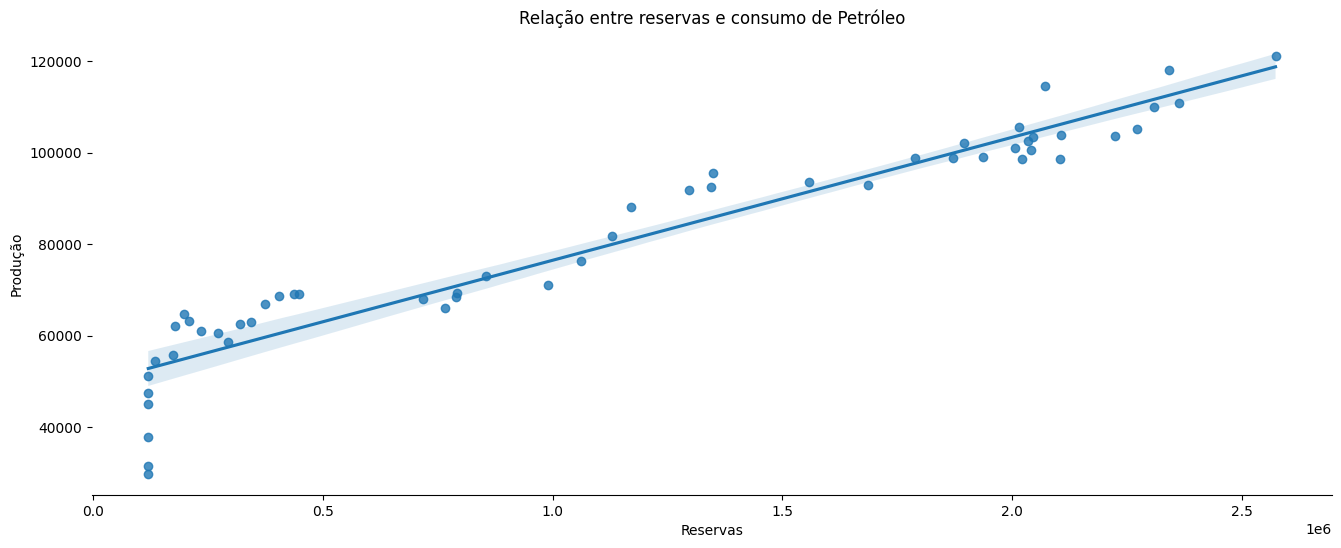

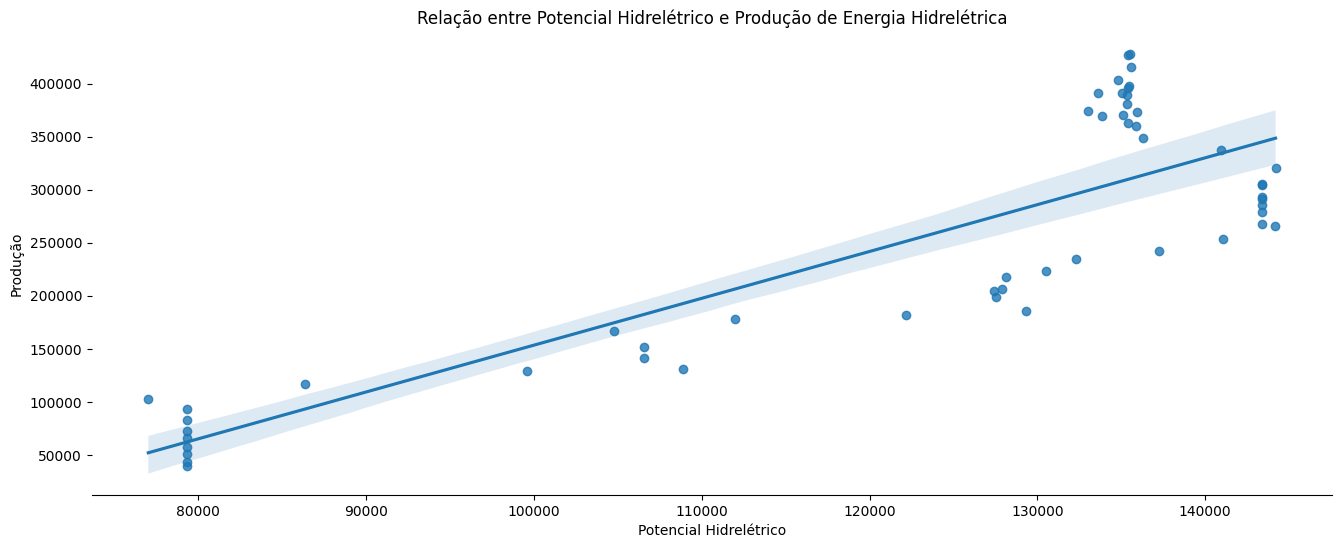

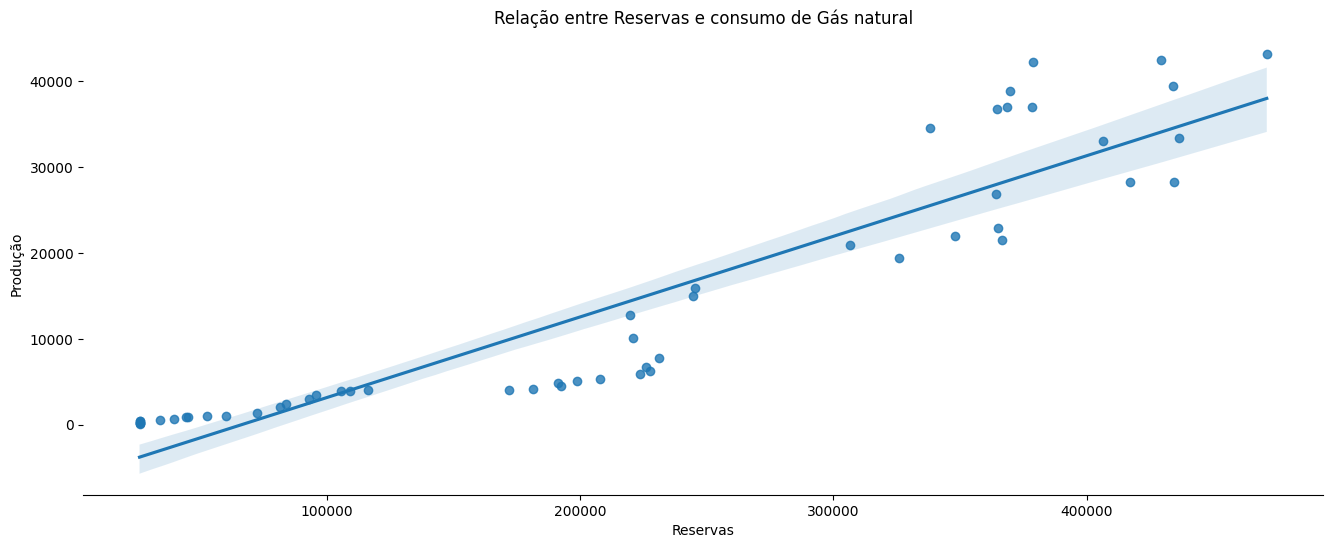

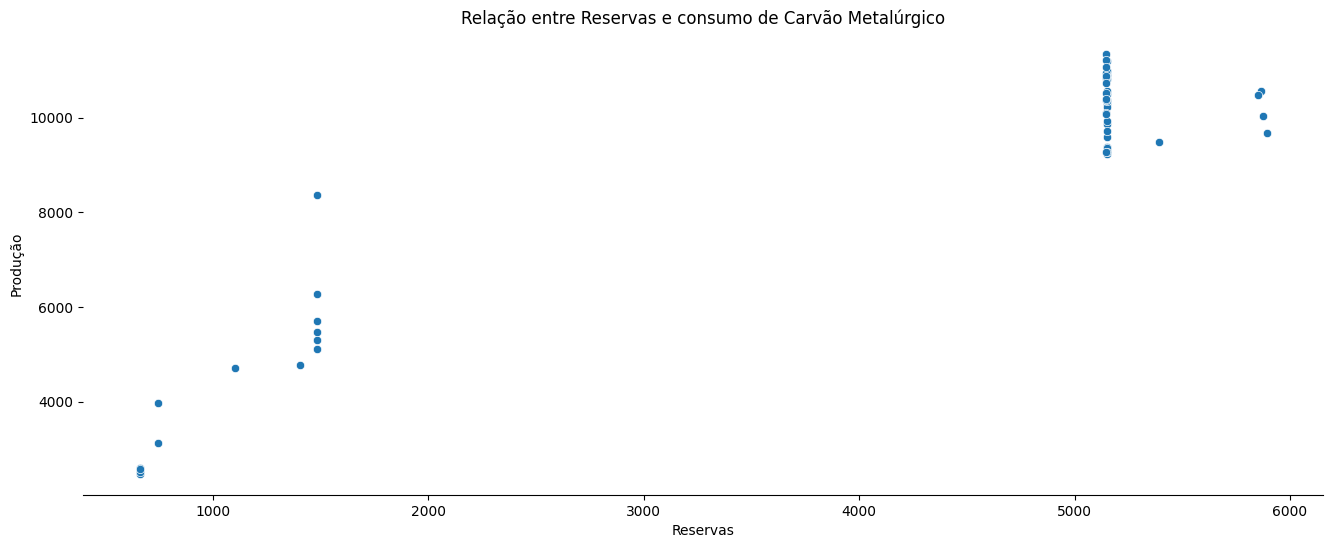

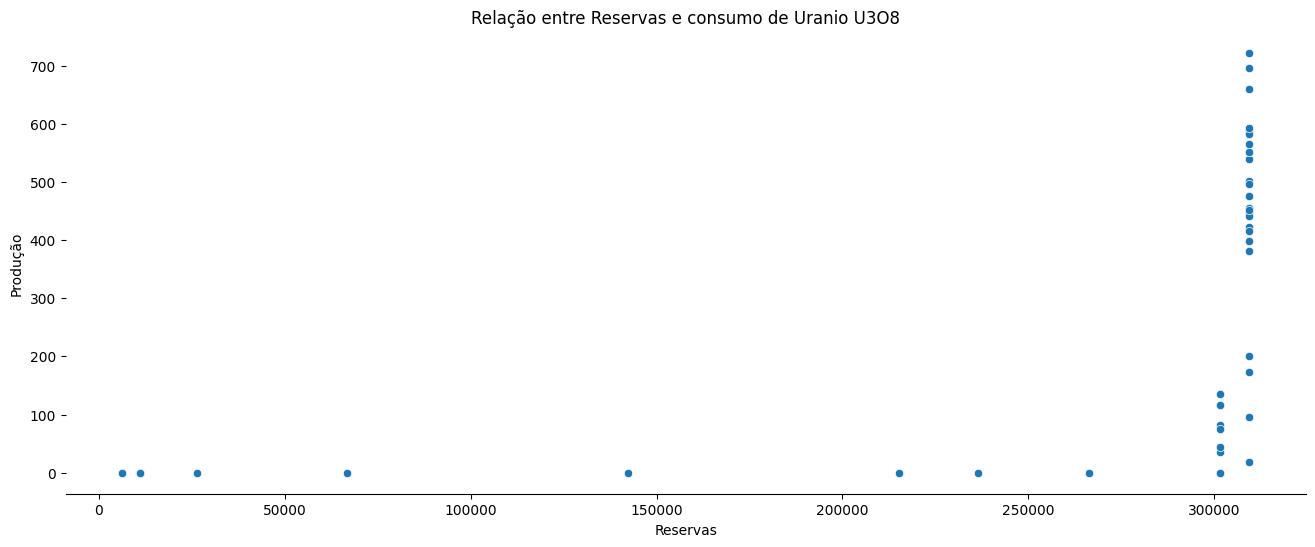

In [135]:
def plot_pet():
    sns.regplot(df, x=df['petróleo'], y=df['consumo_total_petróleo'])

def plot_hidr():
    sns.regplot(df, x=df['hidraulico_total_mw_filt'], y=df['consumo_total_hidraulica'])

def plot_gas():
    sns.regplot(df, x=df['gás_natural'], y=df['consumo_total_gas_natural'])

def plot_carv():
    sns.scatterplot(df, x=df['carvão_metalúrgico'], y=df['consumo_total_carvão_met'])

def plot_uran():
    sns.scatterplot(df, x=df['uranio_u3o8'], y=df['consumo_total_uranio_u3o8'])

basic_plot('Relação entre reservas e consumo de Petróleo', 'Reservas', 'Produção', plot_pet)
basic_plot('Relação entre Potencial Hidrelétrico e Produção de Energia Hidrelétrica', 'Potencial Hidrelétrico',
           'Produção', plot_hidr)
basic_plot('Relação entre Reservas e consumo de Gás natural', 'Reservas',
           'Produção', plot_gas)
basic_plot('Relação entre Reservas e consumo de Carvão Metalúrgico', 'Reservas',
           'Produção', plot_carv)
basic_plot('Relação entre Reservas e consumo de Uranio U3O8', 'Reservas',
           'Produção',plot_uran)

Como esperado, petróleo, gás e p.hidrelétrico continuam com relações linares, porém, carvão metalúrgico desta vez apresentou uma certa linearidade, e o urânio continuou no mesmo padrão de comportamento